Project 1

Sabrina Pereira

In [131]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

I set out to explore how the opiod epidemic has affected the life expectancy in the US, using age-adjusted death rates.

First, let us load the data:

In [132]:
nchs = pd.read_csv('nchs.csv', sep=',')
opioid = pd.read_csv('Opiod Related Deaths, 1999-2017.txt', sep='\t')
mortality = pd.read_csv('All Deaths, 1999-2017.txt', sep='\t')

#Clean data to only contain rows that have valid years
opioid = opioid[opioid.Year.notna()]
mortality = mortality[(mortality.Year.notna()) & (mortality['Ten-Year Age Groups Code'] != 'NS')]



In [133]:
#Look at population as a whole
everyone = nchs[(nchs.Race == 'All Races') & (nchs.Sex == 'Both Sexes')]
everyone.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


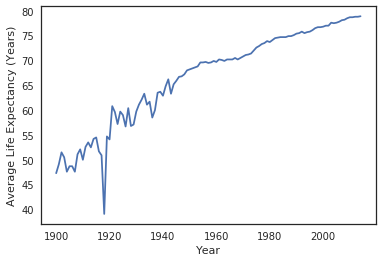

In [134]:
plt.plot(everyone.Year, everyone['Average Life Expectancy (Years)'])

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)');

Here I will add the life expectancies the CDC has released in recent years that were not included in the dataset.

In [135]:
d = {'Year': [2017, 2016, 2015], 'Race': 3*['All Races'], 'Sex' : 3*['Both Sexes'], 'Average Life Expectancy (Years)':[78.6,78.7, 78.7], 'Age-adjusted Death Rate': [731.9, 728.8, 733.1]}
df = pd.DataFrame(data=d)
a = 3*['a']

temp = everyone.drop([0])
everyone = df.append(temp, ignore_index=True)


Let's take a look at how life expectancy has changed in the recent years

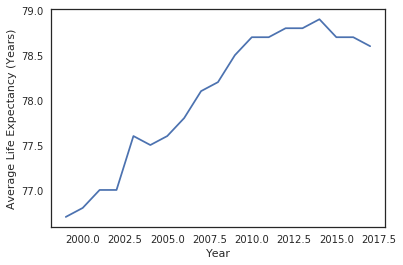

In [136]:
recent = everyone[everyone.Year > 1998]

plt.plot(recent.Year, recent['Average Life Expectancy (Years)'])

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)');

Let's look at the data for opiod overdose related deaths from 1999-2017

Lets take a look at how opiod overdose related deaths have changed over the years. In order to adjust for population, we will use the crude rate instead of number of deaths - this indicates deaths per 100,000 people.

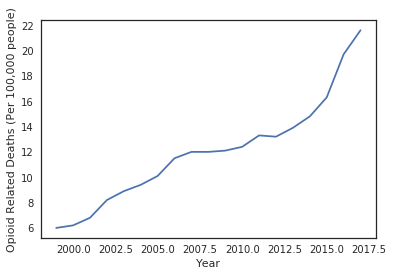

In [137]:
#Gather the total deaths in a year
totals = opioid[opioid.Notes == 'Total'].reset_index(drop=True)

plt.plot(totals.Year, totals['Crude Rate'].astype('float64'))

plt.xlabel('Year')
plt.ylabel('Opioid Related Deaths (Per 100,000 people)');

It seems that around 2015, when we start noticing that the number of opiod overdose releated deaths starts dramatically increasing, the life expectancy starts to drop.

If the increase in opiod related deaths has impacted the life expectancy negatively, we would expect to see that there is a negative relatioship between the two variables.

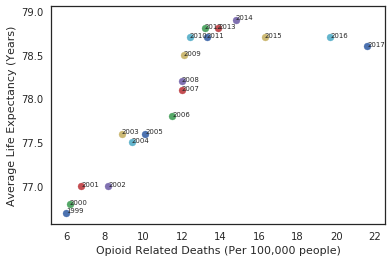

In [138]:
#Use the reverse of the life expectancy column to ensure the years are matched up correctly between the 2 datasets
recent_adjusted = recent[::-1].reset_index(drop=True)


for i, txt in enumerate(recent_adjusted.Year):
#     print(i,txt)
#     print(totals['Crude Rate'].astype('float64')[i],recent_adjusted['Average Life Expectancy (Years)'][i])
    plt.scatter(totals['Crude Rate'].astype('float64')[i],recent_adjusted['Average Life Expectancy (Years)'][i])
    plt.annotate(txt, (totals['Crude Rate'].astype('float64')[i],recent_adjusted['Average Life Expectancy (Years)'][i]), fontsize = 'xx-small')


plt.xlabel('Opioid Related Deaths (Per 100,000 people)')
plt.ylabel('Average Life Expectancy (Years)');



Unfortunately, there seems to be a very positive relationship between opioid related deaths and average life expectancy in the very beginning. The deaths related to opioid overdoses cannot be contriuting to this rising life expectancy - this is more likely due to other factors such as improvements in healthcare and sanitation. 

Recalcultating the theoretical life expectancies removing the effect of the opioid related deaths to observe how much of the drop in life expectancy is explained by the opiod related deaths would be ideal, but it was a bit out of scope for this project (could likely be done in a continuation of the project).

For simplifications, I will then be looking at how the Age-adjusted death rate would changes, as I suspect that the variables are closely related.

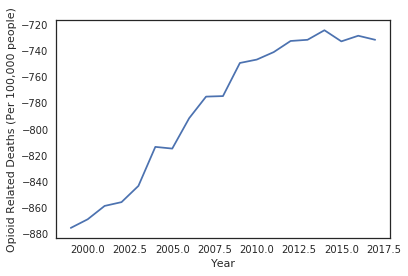

In [139]:
plt.plot(recent_adjusted.Year, -recent_adjusted['Age-adjusted Death Rate']);
plt.xlabel('Year')
plt.ylabel('Opioid Related Deaths (Per 100,000 people)');

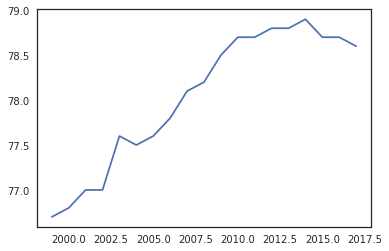

In [140]:
plt.plot(recent_adjusted.Year, recent_adjusted['Average Life Expectancy (Years)']);

The two graphs seem quite similar, so I performed a linear regression to see how strong the correlation is between the two variables. The coefficient of determination is .97, indicating that by knowing what happens to the age-adjusted death rate we know much about what is going on with the average life expectancy.

0.9742939852917004


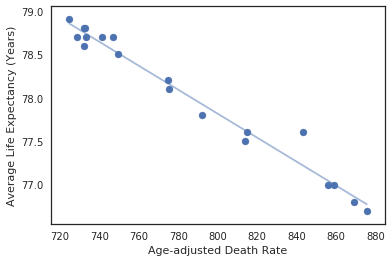

In [206]:
from scipy.stats import linregress

xs = recent_adjusted['Age-adjusted Death Rate']
ys = recent_adjusted['Average Life Expectancy (Years)']

res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.5)



plt.scatter(recent_adjusted['Age-adjusted Death Rate'], recent_adjusted['Average Life Expectancy (Years)']);
plt.xlabel('Age-adjusted Death Rate')
plt.ylabel('Average Life Expectancy (Years)')
print(res.rvalue**2)

Implementation of creating an Age-Adjusted Death Rate from the CDC data to follow

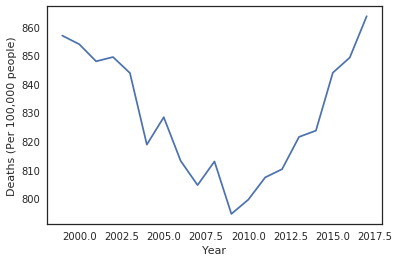

In [143]:
#Gather the total deaths in a year
all_totals = mortality[mortality.Notes == 'Total'].reset_index(drop=True)

plt.plot(all_totals.Year, all_totals['Crude Rate'].astype('float64'))

plt.xlabel('Year')
plt.ylabel('Deaths (Per 100,000 people)');

I will be trying to 

In [144]:
codes = ['1','1-4','5-14','15-24','25-34','35-44','45-54','55-64','65-74','75-84', '85+']
ages = [.5, 2.5, 9.5, 19.5,29.5,39.5,49.5,59.5,69.5,79.5, 89.5]


opioid['Age'] = opioid['Ten-Year Age Groups Code'].replace(codes,ages)



# for i in range(len(codes)):
#     opioid.replace(codes[i],ages[i])


In [145]:
# mortality.loc[mortality.Year == 2000, 'Year']

# mortality.loc[mortality['Ten-Year Age Groups Code'] in codes, 'Year']

# mortality2 = mortality[mortality['Ten-Year Age Groups Code'] != 'NS']

# age_specific_dr = []

ms = mortality[(mortality.Year == 2000)&(mortality['Ten-Year Age Groups Code'] == '1')]
# ms['Ten-Year Age Groups Code'] = 5
ms.re_index()





AttributeError: 'DataFrame' object has no attribute 're_index'

In [165]:
pop_2000 = float(mortality.Population[25])
pop_2000

281421906.0

In [172]:
adjustment_mapping = {}

for i, rows in mortality[mortality.Year == 2000].iterrows():
    adjustment_mapping[rows['Ten-Year Age Groups Code']] = float(rows['Population'])/pop_2000

In [197]:
def age_adjust_death_rates(row):
    return adjustment_mapping.get(row['Ten-Year Age Groups Code']) 

In [196]:
ms = mortality2.iloc[2]
adjustment_mapping.get(ms['Ten-Year Age Groups Code']) * float(ms['Crude Rate'])

2.7149376644474863

In [199]:
mortality2['AADR2'] =  mortality2.apply(age_adjust_death_rates, axis=1)

/home/spereira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
mortality

,Notes,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Deaths,Population,Crude Rate
0,NaN,1999.0,1999.0,< 1 year,1,27937.0,3795762,736.0
1,NaN,1999.0,1999.0,1-4 years,1-4,5249.0,15339782,34.2
2,NaN,1999.0,1999.0,5-14 years,5-14,7595.0,40819824,18.6
3,NaN,1999.0,1999.0,15-24 years,15-24,30656.0,38676031,79.3
4,NaN,1999.0,1999.0,25-34 years,25-34,41066.0,40178406,102.2
5,NaN,1999.0,1999.0,35-44 years,35-44,89256.0,45076677,198.0
6,NaN,1999.0,1999.0,45-54 years,45-54,152974.0,36577819,418.2
7,NaN,1999.0,1999.0,55-64 years,55-64,238979.0,23778026,1005.0
8,NaN,1999.0,1999.0,65-74 years,65-74,452600.0,18418909,2457.3
9,NaN,1999.0,1999.0,75-84 years,75-84,698590.0,12224914,5714.5


In [108]:
recent_adjusted

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1999,All Races,Both Sexes,76.7,875.6
1,2000,All Races,Both Sexes,76.8,869.0
2,2001,All Races,Both Sexes,77.0,858.8
3,2002,All Races,Both Sexes,77.0,855.9
4,2003,All Races,Both Sexes,77.6,843.5
5,2004,All Races,Both Sexes,77.5,813.7
6,2005,All Races,Both Sexes,77.6,815.0
7,2006,All Races,Both Sexes,77.8,791.8
8,2007,All Races,Both Sexes,78.1,775.3
9,2008,All Races,Both Sexes,78.2,774.9
